In [ ]:
"""
#Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). 
Lending Club connects people who need money (borrowers) with people who have money (investors). 
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.
We will try to create a model that will help predict this.



Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016),
so let's check out some of their data and keep the context in mind.
This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
You can download the data from [here](https://www.lendingclub.com/info/download-data.action) 
or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.


"""

In [ ]:
"""
Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, 1 and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
"""

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Reading the dataset using pandas 

In [2]:
loans_df=pd.read_csv('loan_data.csv')

In [ ]:
#Using the head function check top features

In [4]:
loans_df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [ ]:
#Using pandas the info function

In [5]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Observations from the dataset above

In [ ]:
 
#credit.policy is the int64
#Purpose is an object
#the rest are float64

In [7]:
#Looking the shape of the dataset
loans_df.shape

(9578, 14)

# Basic Summary Statistics using pandas 'describe '

In [9]:


loans_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
#USING Tail function

loans_df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


# Data Exploration (A.K.A EDA)

Text(0.5, 0, 'FICO Visualization')

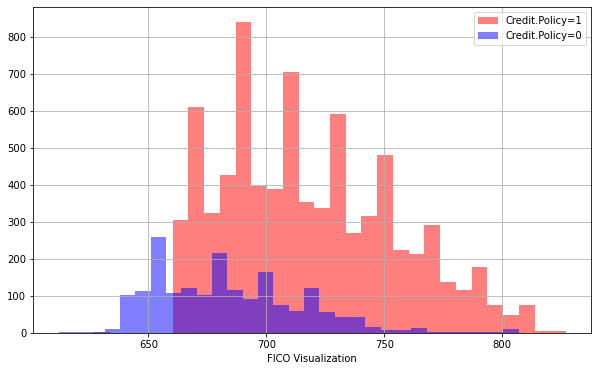

In [11]:
#Creating a histogram of FICO distributions

plt.figure(figsize=(10, 6))
loans_df[loans_df['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='red', 
                                                     bins=30, label='Credit.Policy=1')

loans_df[loans_df['credit.policy'] == 0]['fico'].hist(alpha=0.5, color='blue', 
                                                     bins=30, label='Credit.Policy=0')

plt.legend()
plt.xlabel('FICO Visualization')

In [ ]:
#Second hist 

Text(0.5, 0, 'FICO Visualization')

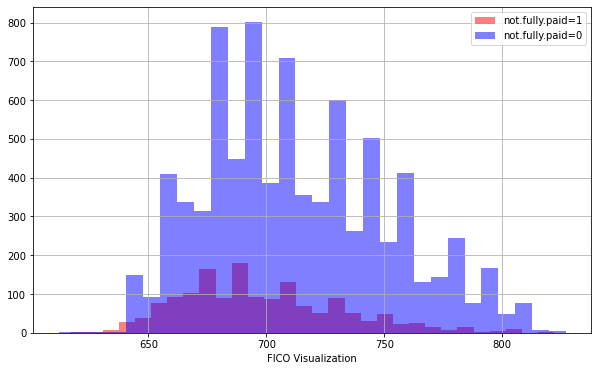

In [12]:
plt.figure(figsize=(10, 6))
loans_df[loans_df['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='red', 
                                                      bins=30, label='not.fully.paid=1')

loans_df[loans_df['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='blue', 
                                                      bins=30, label='not.fully.paid=0')
  
plt.legend()
plt.xlabel('FICO Visualization')                                                     

In [ ]:
#A countplot using seaborn


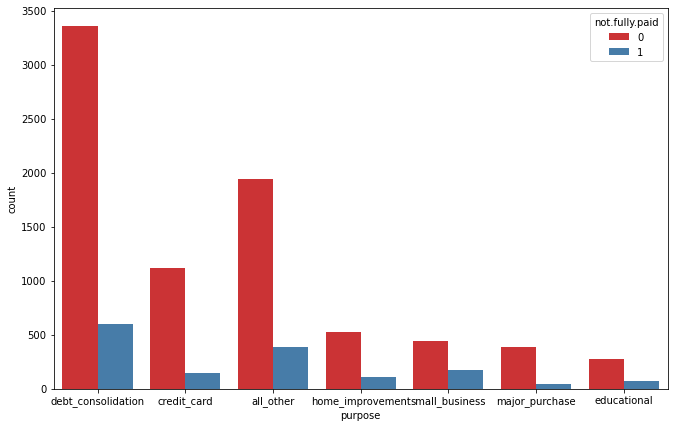

In [14]:
plt.figure(figsize=(11, 7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans_df, palette='Set1' 
)

# Looking at the trend between FICO score and interest rate

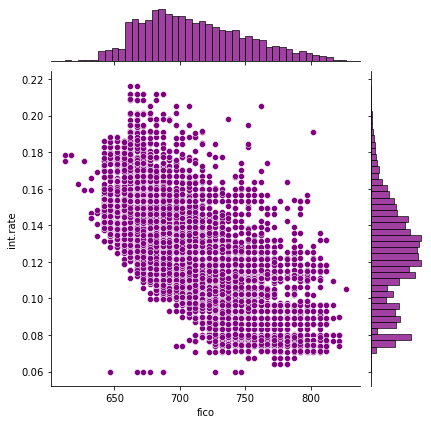

In [18]:
sns.jointplot(x='fico', y='int.rate', data=loans_df, color='purple')

<Figure size 792x504 with 0 Axes>

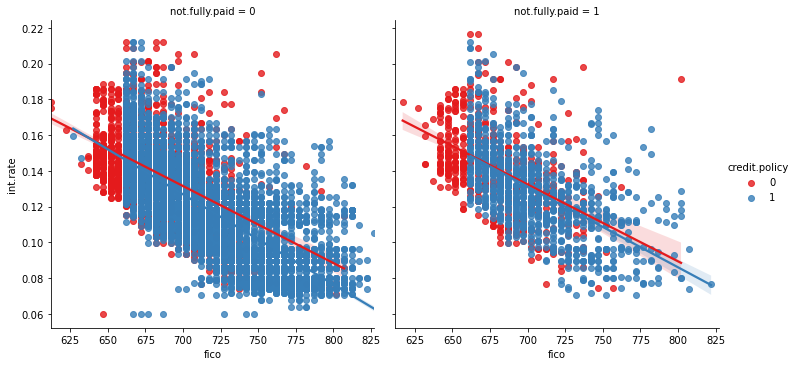

In [19]:
#Creating another plot using implot()

plt.figure(figsize=(11, 7))
sns.lmplot(y='int.rate', x='fico', data=loans_df, hue='credit.policy',
          col='not.fully.paid', palette='Set1')

# Setting up the data

In [20]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [29]:
#There is one categorical feature in there
#purpose


cate_features=['purpose']

In [30]:
loans_df_2=loans_df.copy()

In [34]:
loans_copy=loans_df_2.copy()

In [33]:
loans_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [31]:
final_df=pd.get_dummies(loans_df, columns=cate_features, drop_first=True)

In [32]:
#info () to 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [35]:
cate_feats = ['purpose']

In [38]:
final_data = pd.get_dummies(loans_df_2, columns=cate_feats,drop_first=True)

In [39]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training a Decision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree=DecisionTreeClassifier()

In [45]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

In [46]:
preds=dtree.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
#Print the results

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [49]:
print(confusion_matrix(y_test, preds))

[[1999  432]
 [ 342  101]]


In [ ]:
accuracy=TP /TP + FP + TN + FN

In [50]:
accuracy=1999/(1999 + 432 + 342 + 101)

In [51]:
accuracy

0.6955462769659012

# Training the Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc=RandomForestClassifier(n_estimators=600)

In [56]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

# Predictions and Evaluation

In [ ]:

#Let's predict off the y_test values and evaluate our model.

#Predict the class of not.fully.paid for the X_test data.**

In [57]:
preds=rfc.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [61]:
print(confusion_matrix(y_test, preds))

[[2423    8]
 [ 433   10]]


In [67]:
accuracy=2423/(2423 + 8+433+10)*100

In [68]:
accuracy 

84.30758524704245

# Great! Bit better than the DecisionTreeClassifier